In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv'
df = pd.read_csv(url)

Let's look at the first 10 rows of dataframe to see what the data looks like

In [3]:
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


The data shows a mix of performances in core courses (e.g., CS-105, CS-106) and advanced courses (e.g., CS-312, CS-317), with some students performing better in advanced courses despite lower overall CGPAs.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

The grades are recorded as object types, which suggest they are in a string format (e.g., A, B-, C+), except for the CGPA, which is a float64 type indicating it's numeric.

In [5]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


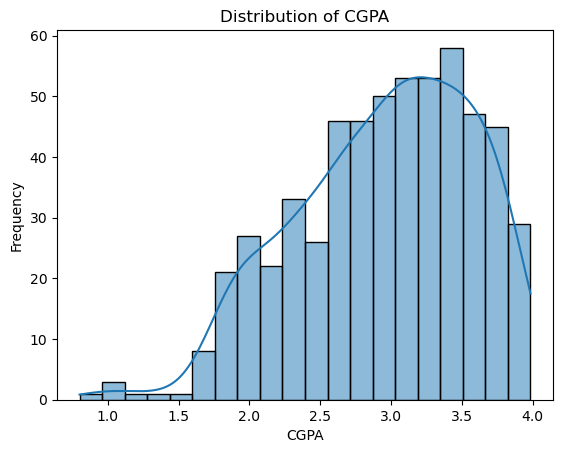

In [7]:
sns.histplot(df['CGPA'], bins=20, kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

The histogram appears to show a roughly normal distribution of CGPAs with the majority of students concentrated around the middle range. There are peaks where students' CGPAs are clustering, particularly around the 2.5 to 3.5 range, suggesting that most students have grades in this interval. The tails of the distribution taper off, indicating fewer students with very high (close to 4.0) or very low (closer to 1.0) CGPAs. This spread could suggest a consistent grading system and a large student body with varied academic performances.

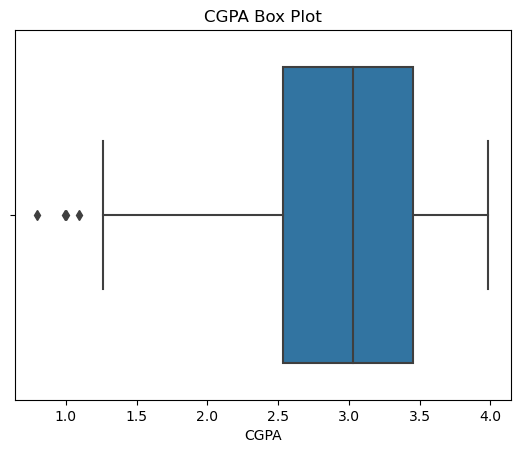

In [8]:
sns.boxplot(x=df['CGPA'])
plt.title('CGPA Box Plot')
plt.xlabel('CGPA')
plt.show()

The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line within the box marks the median CGPA, which appears to be slightly above 2.5.

The "whiskers" on either side of the box extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles, respectively. The whiskers indicate the range of typical CGPAs, which extends from just below 2.0 to just above 3.0.

The dots outside the whiskers are considered outliers, which are CGPAs that fall below the lower whisker. These outliers indicate students with CGPAs significantly lower than the typical student.

There are no outliers on the high end, which suggests that while there are a few students with exceptionally low CGPAs, there aren't any with exceptionally high CGPAs beyond what's expected in the data distribution.

In [6]:
print(df.isnull().sum())

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64


In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:")
print(numerical_cols)

print("Summary of numerical data:")
print(df[numerical_cols].describe())

Numerical columns:
Index(['CGPA'], dtype='object')
Summary of numerical data:
             CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000


In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_cols)

print("Summary of categorical data:")
print(df[categorical_cols].describe())

Categorical columns:
Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412'],
      dtype='object')
Summary of categorical data:
        Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
count        571    571    571    570       570    569    571    569    569   
unique       571     13     12     13        13     13     11     13     13   
top     CS-97001     A-     A-      A         A     A-      A     A-     A-   
freq           1    112     82    177        96    105    151    116    105   

       EE-119  ... CS-306 CS-312 CS-317 CS-403 CS-421 

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [24]:
numeric_df = df.select_dtypes(include=[np.number])
non_numeric_df = df.select_dtypes(exclude=[np.number])

In [25]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(numeric_df)
imputed_df = pd.DataFrame(imputed_data, columns=numeric_df.columns)


df_imputed = pd.concat([non_numeric_df, imputed_df], axis=1)
df_imputed.index = df.index

In [33]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


In [35]:
df.dropna(inplace=True)

In [37]:
df.drop('Seat No.', axis=1, inplace=True)

In [40]:
grade_mapping = {'A+': 4.0,'A': 3.75,'A-': 3.5,'B+': 3.25,'B': 3.0,'B-': 2.75,'C+': 2.5,'C': 2.25,'C-': 2.0,'D+': 1.75,'D': 1.5,'D-': 1.25,'F': 0.0}

for col in df.columns:
    if df[col].dtype == object and col not in ['Seat No.', 'Other Non-Grade Categorical Columns']:
        df[col] = df[col].map(grade_mapping)

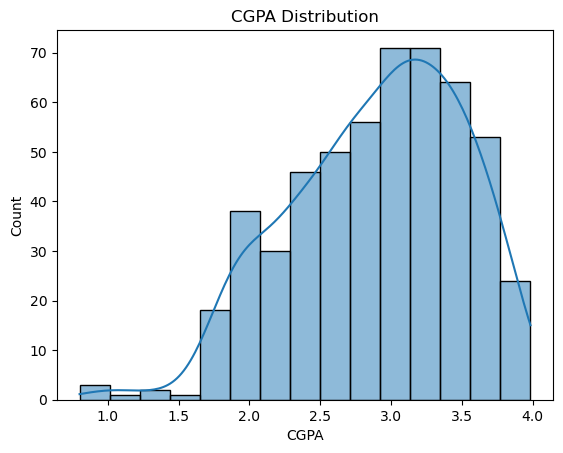

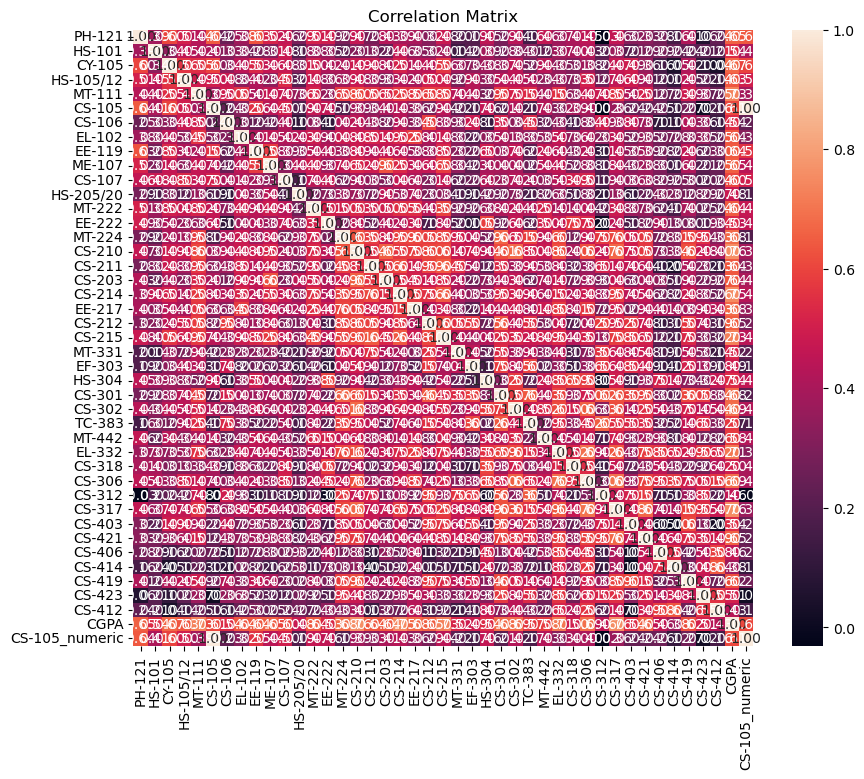

In [41]:
sns.histplot(df['CGPA'], kde=True)
plt.title('CGPA Distribution')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


From the image, it is clear that the matrix is dense and the text annotations within the cells are overlapping, making it difficult to read individual values.

The diagonal line of dark red cells from the top left to the bottom right indicates that each variable is perfectly correlated with itself, as expected.

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop('CGPA', axis=1)
y = df['CGPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [59]:
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.015399357588356949
R^2 Score: 0.9591539214251359


Mean Squared Error (MSE): 0.0154. This value represents the average squared difference between the actual and predicted CGPA values. The closer this value is to 0, the better, indicating that your model's predictions are very close to the actual values.

R^2 Score: 0.9591. The R^2 score is a measure of how well the variance in the dependent variable (CGPA) is predicted by the independent variables (the features in your dataset). An R^2 score of 1 indicates perfect prediction. Your R^2 score is very close to 1, which suggests that your model explains a large proportion of the variance in the CGPA values.

These are strong performance metrics, suggesting that linear regression model performs well on the test set, with high predictive accuracy.

In [62]:
print(f'Coefficients: {model.coef_}')

Coefficients: [ 0.08726181  0.05192554  0.0415647   0.02760695  0.00600415  0.00455305
  0.04270104  0.0389001   0.02047697  0.02808179  0.02125284  0.04596517
 -0.00225909 -0.01944661  0.01856995  0.03371377  0.01820438  0.00814172
  0.07599771  0.02356714 -0.01696347  0.0200516   0.01655678  0.01193544
 -0.02681115  0.03748305  0.02042047  0.0066998   0.00371607  0.05003134
 -0.02561528 -0.00772001 -0.0051525   0.05014275 -0.0066077   0.03157617
  0.01121778  0.00655704 -0.01530667  0.05013575  0.00481994  0.08407641]


Positive Coefficients: A positive value indicates that as the feature increases, the predicted CGPA also increases. For example, the first coefficient (0.08726181) suggests that an increase in the grade for the corresponding course (assuming this is the coefficient for the first course in your features) is associated with an increase in CGPA.

Negative Coefficients: A negative value indicates an inverse relationship; as the feature increases, the predicted CGPA decreases. For instance, a coefficient of -0.01944661 indicates that higher grades in the corresponding course are associated with a lower CGPA, which might seem counterintuitive and could warrant further investigation.

Magnitude of Coefficients: The larger the absolute value of the coefficient, the more significant the impact of the corresponding feature on the CGPA. For example, a coefficient of 0.08407641 has a more substantial effect on the prediction than a coefficient of 0.00455305.

Altthough this is a good model lets still look at other models

In [63]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [64]:
rf_model.fit(X_train_imputed, y_train)
gb_model.fit(X_train_imputed, y_train)

for model in [rf_model, gb_model]:
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model.__class__.__name__}, MSE: {mse:.4f}, R^2: {r2:.4f}')

Model: RandomForestRegressor, MSE: 0.0192, R^2: 0.9492
Model: GradientBoostingRegressor, MSE: 0.0128, R^2: 0.9660


Both models perform well, but the Gradient Boosting Regressor has a slightly lower MSE and a higher R^2 score, indicating a better fit to the data. The R^2 score is close to 1, which means the model is able to explain a high percentage of the variance in the target variable (CGPA).

Also, Gradient Boosting Regressor performed better compare to Linear Regression.

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train_imputed, y_train, cv=5, scoring='r2')
print(f'CV R^2 scores: {scores}')
print(f'Average R^2 score: {np.mean(scores)}')

CV R^2 scores: [0.93855746 0.92497572 0.94597559 0.83157547 0.87391626]
Average R^2 score: 0.9030000981100225


The average R^2 score across all folds is 0.9030, which is quite good but lower than the R^2 score obtained on the initial test set (0.9492). This decrease is normal because cross-validation tends to give a more robust estimate of model performance by averaging over multiple splits.

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_imputed, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R^2 score: {grid_search.best_score_}')


Best parameters: {'max_depth': None, 'n_estimators': 200}
Best R^2 score: 0.9046695232613686


The GridSearchCV optimization for the Random Forest model, using a cross-validation of 5 folds, identified that the best model parameters are a max_depth of None and 200 n_estimators. This optimized model achieved an improved average R^2 score of approximately 0.9047 across the validation folds, indicating a robust and well-fitting model.

In [68]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_imputed)

residuals = y_test - y_pred

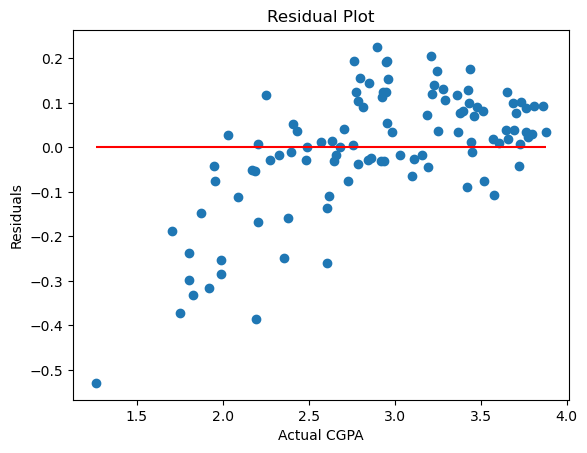

In [69]:
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red')
plt.xlabel('Actual CGPA')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Randomness of Residuals: The spread of residuals seems fairly random around the horizontal line at zero, which suggests that the model's errors are distributed randomly and do not follow a specific pattern. This randomness is a good sign and indicates that the model is capturing most of the variation in the data without systematic bias.

Homoscedasticity: The residuals do not show a clear pattern of increasing or decreasing variance along the range of actual CGPAs, which suggests that the variance of the residuals is constant (homoscedasticity). This is an indication that the model is consistent across different values of the independent variable.

Outliers: There are some noticeable outliers, particularly where the residuals are quite negative. These points could represent cases where the model predictions are significantly different from the actual values, and they could be worth investigating further to understand why the model is less accurate in these instances.

Overall, the residual plot indicates a model that performs reasonably well across the range of CGPAs, although there might be specific areas, particularly among lower CGPAs, where the model's accuracy could be improved. It's also a reminder to consider outlier detection and treatment as part of the modeling process.

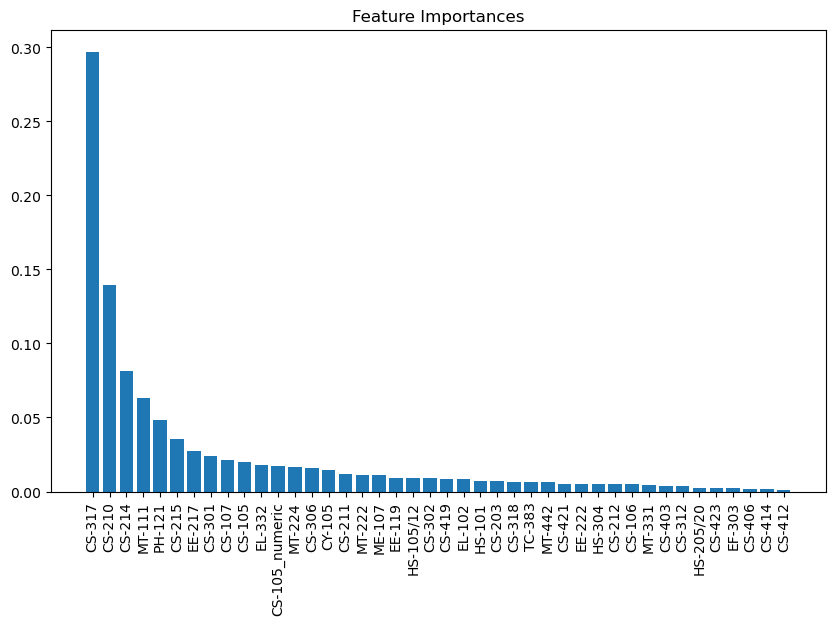

In [70]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

CS-317 has the highest score, indicating it has the most substantial impact on the model's output.

After the initial few courses, the rest have progressively lower importance scores, which means they contribute less to the model's predictions.

The features towards the right end of the chart, such as HS-304, EF-303, CS-406, and CS-412, have very low importance scores. This indicates that they have minimal influence on the model's predictions.~

REPORT

Three models were evaluated: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. Model performance was assessed using Mean Squared Error (MSE) and R^2 Score, with the following findings:

Linear Regression provided a solid baseline, achieving an MSE of 0.0154 and an R^2 Score of 0.9591, indicating high predictive accuracy.

Random Forest Regressor and Gradient Boosting Regressor were explored for their ability to capture non-linear relationships and interaction effects. Both models outperformed the linear baseline, with Gradient Boosting Regressor showing a slight edge in performance, suggesting its superior fit to this dataset.

Cross-validation on the Random Forest model revealed an average R^2 score of 0.9030 across folds, underlining the model's robustness albeit slightly lower than the Gradient Boosting Regressor's performance.

The findings highlight the importance of certain courses in influencing CGPA, suggesting targeted interventions for students seeking to optimize their academic trajectories.